# k-means

In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

In [2]:
y

array([4, 2, 0, ..., 3, 0, 2])

In [3]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [4]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

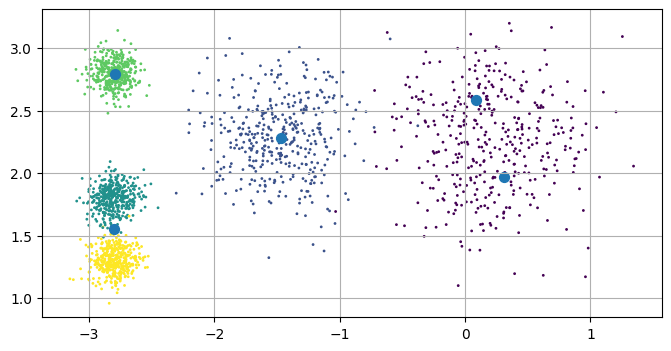

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

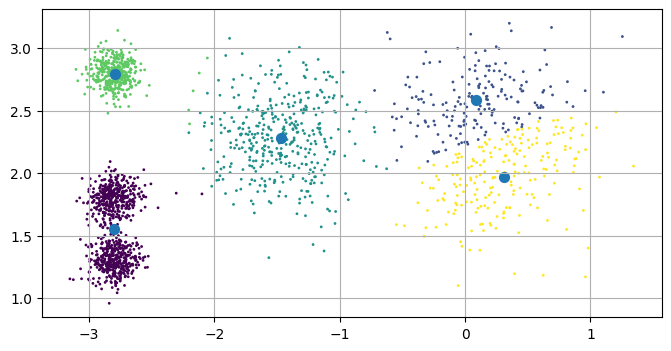

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

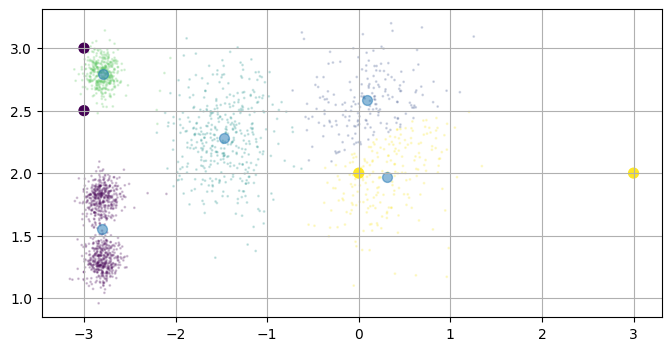

In [7]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
y_new = kmeans.predict(X_new)

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y_pred, alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], s=50, c=y_new)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, alpha=0.5)
plt.grid()

plt.show()

## Centroid initialization methods

In [8]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [ 1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

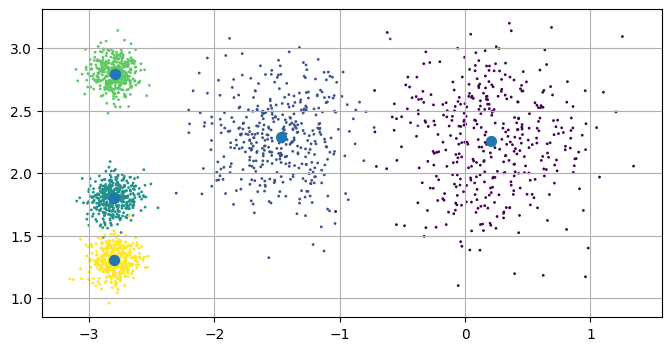

In [9]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

In [10]:
kmeans.inertia_

211.5985372581684

In [11]:
kmeans.score(X)

-211.5985372581684

## Accelerated k-means and mini-batch k-means

In [12]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

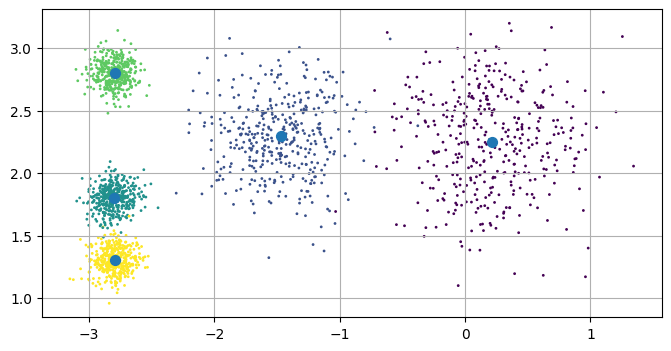

In [13]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y)
plt.scatter(minibatch_kmeans.cluster_centers_[:, 0], minibatch_kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

## Finding the optimal number of clusters

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

# Using clustering for image segmentation

In [15]:
import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [16]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

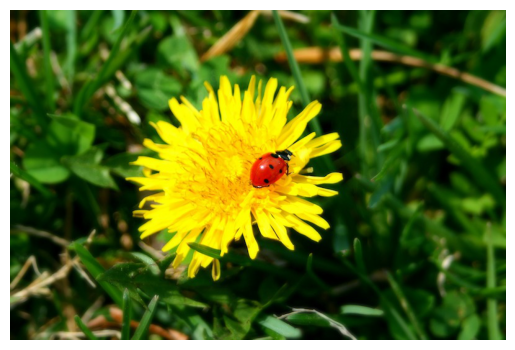

In [17]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [18]:
X = image.reshape(-1, 3) # Reshape to an array of RGB colors
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

# This is NumPy indexing, and works as follows: 
# Select the corresponding value of kmeans.cluster_centers_ based on the index kmeans.labels_ (just an index like any other array).
# The catch is that the resulting value would be the size of the inside array, i.e. kmeans.labels_.
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
segmented_img.shape

(533, 800, 3)

In [19]:
segmented_img[0]/255

array([[0.0220022 , 0.10830368, 0.00568067],
       [0.0220022 , 0.10830368, 0.00568067],
       [0.0220022 , 0.10830368, 0.00568067],
       ...,
       [0.21325479, 0.38075103, 0.05518163],
       [0.21325479, 0.38075103, 0.05518163],
       [0.21325479, 0.38075103, 0.05518163]])

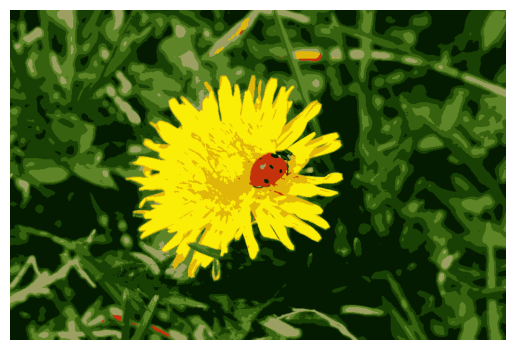

In [20]:
plt.imshow(segmented_img / 255) # Divide by 255 to make the floats fit in the range of 0..1
plt.axis("off")
plt.show()

In [21]:
kmeans.cluster_centers_

array([[  5.6105612 ,  27.61743918,   1.44857047],
       [250.68280046, 237.8319458 ,   6.51237711],
       [ 54.37997208,  97.09151272,  14.07131629],
       [155.1122467 , 160.29920705,  98.37997063],
       [ 93.53208815, 132.47927103,  39.06947451],
       [ 24.39502109,  63.41611633,   4.09118396],
       [195.12454743,  50.81607531,  11.20057929],
       [223.40683449, 182.94424185,   9.39848253]])

In [22]:
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 0], dtype=int32)

# Using clustering for semi-supervised learning

In [23]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [24]:
# Pretend we only have labels for 50 instances, so we train the model only on those
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [25]:
log_reg.score(X_test, y_test)

0.7581863979848866

On full training set (1400 elements) we get 90.9% accuracy.
Let's improve this by, instead of take any 50 instances, divide the training set into 50 clusters and then take the most representative values from each of them, i.e. the closest to each cluster (to the centroid).

In [26]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) # Transform the values group by the clusters
representative_digit_idx = np.argmin(X_digits_dist, axis=0) # Get an array with the indices with the min value to the centroids (1 entry per k)
X_representative_digits = X_train[representative_digit_idx] # Get the whole digit based on the previous indices
X_representative_digits # Images closest to the centroids

array([[ 0.,  0.,  0., ..., 15., 12.,  0.],
       [ 0.,  0.,  2., ...,  5.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  5., 16., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 14.,  6.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.]])

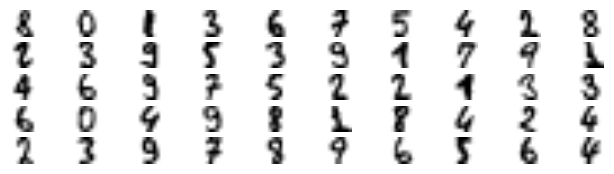

In [27]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [28]:
# We have to label the X_representative manually
y_representative_digits = np.array([
    8, 0, 1, 3, 6, 7, 5, 4, 2, 8,
    2, 3, 9, 5, 3, 9, 1, 7, 9, 1,
    4, 6, 9, 7, 5, 2, 2, 1, 3, 3,
    6, 0, 4, 9, 8, 1, 8, 4, 2, 4,
    2, 3, 9, 7, 8, 9, 6, 5, 6, 4,
])

In [29]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8312342569269522

## Label propagation

It's possible to continue improving the previous score by propagating the labels to all the other instances.

In [30]:
kmeans.labels_

array([31,  2, 38, ...,  7,  7,  5], dtype=int32)

In [31]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [32]:
y_train_propagated[kmeans.labels_ == 2]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
log_reeg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.871536523929471

### Ignore the 1% of instances that are fathest from their cluster center

In [34]:
X_digits_dist.shape

(1400, 50)

In [35]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_] # Get an array of min distances of each cluster
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [36]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8589420654911839

In [37]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9614814814814815

# DBSCAN

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [39]:
dbscan.labels_.shape

(1000,)

In [40]:
dbscan.core_sample_indices_.shape

(800,)

In [41]:
dbscan.components_

array([[-0.33468299,  0.9292647 ],
       [-0.66847764,  0.70291979],
       [ 0.47788102,  0.86832716],
       ...,
       [ 0.7712193 ,  0.64858322],
       [-0.4066395 ,  0.89190287],
       [ 0.29792974, -0.21039327]])

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [43]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([9, 3, 4, 7])

In [44]:
knn.predict_proba(X_new)

array([[0.22, 0.  , 0.  , 0.26, 0.  , 0.  , 0.  , 0.  , 0.  , 0.52, 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.  , 0.  , 0.04, 0.  , 0.62, 0.  , 0.34, 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  ,
        0.02]])

In [45]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  3,  4, -1])

# Gaussian Mixtures

In [46]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [47]:
gm.weights_

array([0.19954076, 0.60739009, 0.19306916])

In [48]:
gm.means_

array([[-0.75844382,  0.55385976],
       [ 0.50929378,  0.24374761],
       [ 1.76909538, -0.04002771]])

In [49]:
gm.covariances_

array([[[ 0.04911996,  0.0591306 ],
        [ 0.0591306 ,  0.08708876]],

       [[ 0.18163262, -0.11245698],
        [-0.11245698,  0.29599619]],

       [[ 0.04264174,  0.05277969],
        [ 0.05277969,  0.08116269]]])

## Bayesian Gaussian Mixture Models (Bayesian Information Criterion (BIC))

In [50]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

/home/julio/.local/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


array([0.13, 0.12, 0.11, 0.15, 0.14, 0.17, 0.08, 0.09, 0.  , 0.  ])

7 clusters needed

# Exercises

## 1-9

1. How would you define clustering? Can you name a few clustering algorithms?<br>
R. The process when data is categorized into groups just by proximity and not by labels, to keep the similiar close together.
2. What are some of the main applications of clustering algorithms?<br>
R. Pattern detection (e.g. search for similar images in a search engine. It doesn't matter what it is, just to give the similar ones), fraud detection.
3. Describe two techniques to select the right number of clusters when using k-means.<br>
R. Check for the elbow point of the inertia and a more precise method, but more computationally expensive, compute the silhouette score.
4. What is label propagation? Why would you implement it, and how?<br>
R. When you don't have the labels for the training data you can label some of them manually, and then propagate that labels to other instances. This is done by clustering the data and the algorithm would assign the labels that you enter into the other similar instances in the same clusters. The optimal way would be to select the most representative instances (closest ones from the centroids) and label them. Then propagate the labels. It is also a good idea to eliminate the 1% farthest instances because could be outliers.
5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?<br>
R. K-Means for large datasets. DBSCAN for high density regions.
6. Can you think of a use case where active learning would be useful? How would you implement it?<br>
R. When labeling is very costly.
8. What is the difference between anomaly detection and novelty detection?<br>
R. Novelty detection makes the assumption that the training data is clean, i.e. do not contain outliers, which anomaly detection does not.
9. What is a Gaussian mixture? What tasks can you use it for?<br>
R. It's a model that assumes that the data was generated using a gaussian distribution with unknown parameters.
10. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?<br>
R. Plot Bayesian Information Criterion (BIC) or Akaike Information Criterion (AIC) as a function of the number of clusters and choose the one that minimizes BIC or AIC.

## 10